In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import missingno as msn
import datetime
from pandas_profiling import ProfileReport
import sklearn

In [2]:
df = pd.read_parquet("escooter_history_2022.parquet")

In [3]:
df.loc[df.temp > 50, "temp"] = df.temp.div(100)

In [25]:
df.registered_customer

0          True
1          True
2          True
3          True
4          True
           ... 
3755410    True
3755411    True
3755412    True
3755413    True
3755414    True
Name: registered_customer, Length: 3755415, dtype: boolean

In [22]:
df = pd.get_dummies(df)

In [24]:
df_slice2 = df[df["registered_customer"] == False].copy()

In [26]:
df_slice2

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,registered_customer,"weather_clear, few clouds","weather_cloudy, mist",weather_heacy rain or thunderstorm or snow or ice pallets,weather_light snow or rain or thunderstorm
8,2020-01-04 00:31:22,0.0,0.0,9.84,14.395,81.0,0.0000,False,1,0,0,0
9,2020-01-04 00:35:10,0.0,0.0,9.84,14.395,81.0,0.0000,False,1,0,0,0
11,2020-01-04 00:42:24,0.0,0.0,9.84,14.395,81.0,0.0000,False,1,0,0,0
17,2020-01-04 01:00:14,0.0,0.0,9.02,13.635,80.0,0.0000,False,1,0,0,0
24,2020-01-04 01:11:21,0.0,0.0,9.02,13.635,80.0,0.0000,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3755333,2022-01-03 23:23:12,0.0,1.0,10.66,13.635,65.0,8.9981,False,1,0,0,0
3755334,2022-01-03 23:23:18,0.0,1.0,10.66,13.635,65.0,8.9981,False,1,0,0,0
3755352,2022-01-03 23:32:50,0.0,1.0,10.66,13.635,65.0,8.9981,False,1,0,0,0
3755353,2022-01-03 23:33:34,0.0,1.0,10.66,13.635,65.0,8.9981,False,1,0,0,0


In [28]:
df_slice3 = df_slice2.groupby(pd.Grouper(key="datetime",freq="H")).agg(Ausleihzahl=("registered_customer","count"),holiday=("holiday","mean"),workingday=("workingday","mean"),temp=("temp","mean"),atemp=("atemp","mean"),humidity=("humidity","mean"),windspeed=("windspeed","mean"),clear_few_clouds=("weather_clear, few clouds","mean"),cloudy_mist=("weather_cloudy, mist","mean"),heacy_rain_snow=("weather_heacy rain or thunderstorm or snow or ice pallets","mean"),light_snow_rain_thunderstorm=("weather_light snow or rain or thunderstorm","mean")).reset_index()

In [29]:
df_slice3

,datetime,Ausleihzahl,holiday,workingday,temp,atemp,humidity,windspeed,clear_few_clouds,cloudy_mist,heacy_rain_snow,light_snow_rain_thunderstorm
0,2020-01-04 00:00:00,3,0.0,0.0,9.84,14.395,81.0,0.0000,1.0,0.0,0.0,0.0
1,2020-01-04 01:00:00,8,0.0,0.0,9.02,13.635,80.0,0.0000,1.0,0.0,0.0,0.0
2,2020-01-04 02:00:00,5,0.0,0.0,9.02,13.635,80.0,0.0000,1.0,0.0,0.0,0.0
3,2020-01-04 03:00:00,3,0.0,0.0,9.84,14.395,75.0,0.0000,1.0,0.0,0.0,0.0
4,2020-01-04 04:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2022-01-03 19:00:00,9,0.0,1.0,10.66,12.880,60.0,11.0014,0.0,1.0,0.0,0.0
17540,2022-01-03 20:00:00,5,0.0,1.0,10.66,12.880,60.0,11.0014,0.0,1.0,0.0,0.0
17541,2022-01-03 21:00:00,4,0.0,1.0,10.66,12.880,60.0,11.0014,1.0,0.0,0.0,0.0
17542,2022-01-03 22:00:00,7,0.0,1.0,10.66,13.635,56.0,8.9981,1.0,0.0,0.0,0.0


In [50]:
df_slice3.dropna()


,datetime,Ausleihzahl,holiday,workingday,temp,atemp,humidity,windspeed,clear_few_clouds,cloudy_mist,heacy_rain_snow,light_snow_rain_thunderstorm
0,2020-01-04 00:00:00,3,0.0,0.0,9.84,14.395,81.0,0.0000,1.0,0.0,0.0,0.0
1,2020-01-04 01:00:00,8,0.0,0.0,9.02,13.635,80.0,0.0000,1.0,0.0,0.0,0.0
2,2020-01-04 02:00:00,5,0.0,0.0,9.02,13.635,80.0,0.0000,1.0,0.0,0.0,0.0
3,2020-01-04 03:00:00,3,0.0,0.0,9.84,14.395,75.0,0.0000,1.0,0.0,0.0,0.0
6,2020-01-04 06:00:00,2,0.0,0.0,9.02,13.635,80.0,0.0000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2022-01-03 19:00:00,9,0.0,1.0,10.66,12.880,60.0,11.0014,0.0,1.0,0.0,0.0
17540,2022-01-03 20:00:00,5,0.0,1.0,10.66,12.880,60.0,11.0014,0.0,1.0,0.0,0.0
17541,2022-01-03 21:00:00,4,0.0,1.0,10.66,12.880,60.0,11.0014,1.0,0.0,0.0,0.0
17542,2022-01-03 22:00:00,7,0.0,1.0,10.66,13.635,56.0,8.9981,1.0,0.0,0.0,0.0


In [51]:
df_slice3[df_slice3.temp.isna()]

,datetime,Ausleihzahl,holiday,workingday,temp,atemp,humidity,windspeed,clear_few_clouds,cloudy_mist,heacy_rain_snow,light_snow_rain_thunderstorm
4,2020-01-04 04:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-04 05:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2020-01-05 05:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2020-01-05 06:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2020-01-05 07:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17430,2021-12-30 06:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17453,2021-12-31 05:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17502,2022-01-02 06:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17523,2022-01-03 03:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_slice3.corr()

,registered_customer,temp,atemp,windspeed,humidity
registered_customer,1.000000,0.459885,0.453973,0.091659,-0.356967
temp,0.459885,1.000000,0.987181,-0.027144,-0.073364
atemp,0.453973,0.987181,1.000000,-0.063259,-0.055496
windspeed,0.091659,-0.027144,-0.063259,1.000000,-0.291329
humidity,-0.356967,-0.073364,-0.055496,-0.291329,1.000000


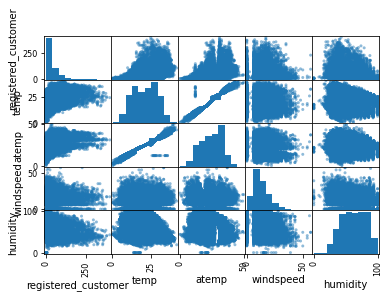

In [10]:
pd.plotting.scatter_matrix(df_slice3);

In [31]:
df_slice3.columns

Index(['datetime', 'Ausleihzahl', 'holiday', 'workingday', 'temp', 'atemp',
       'humidity', 'windspeed', 'clear_few_clouds', 'cloudy_mist',
       'heacy_rain_snow', 'light_snow_rain_thunderstorm'],
      dtype='object')

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Split data in Inputs (X) and outputs (Y)
X = df_slice3[['temp', 'atemp',
       'humidity', 'windspeed']]
# X = df[df.columns.difference(['y','article'])] # alle Spalten außer 'y' und 'article'
Y = df_slice3['Ausleihzahl'] 

In [46]:
# Scale X (to mean 0) and std 1 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False) # with_mean=False: dont rescale the means to being all zero
Xs = pd.DataFrame(scaler.fit_transform(X[X.columns]))
Xs.columns = X.columns

In [47]:
regr = linear_model.LinearRegression()
regr.fit(Xs, Y)
pred = regr.predict(Xs)
print(Xs.columns.values)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('On Training set:')
print("Mean squared error: %.2f" % mean_squared_error(Y, pred))
print("Variance of target variable: %.2f" % np.var(Y))
print('Variance explained: %.2f' % r2_score(Y, pred))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import statsmodels.api as sm
# This linear model does not use a constant, i.e. only y = a1*x1 + ... + an*xn , and NOT y = a1*x1 + ... + an*xn + c,
# However, if one adds a column to X with only 1's, then the coefficient of this column has the same effect as the intercept c above
Xsdqe = sm.add_constant(Xs)

# Learn the "Ordinary Least Squares" model
est = sm.OLS(Y, Xsdqe) # Create the object and hand it the data
est = est.fit() # Let it compute the regression coefficients
print(est.summary()) # show the results - including all sorts of metrics

In [18]:
import scipy.stats.shapiro

ModuleNotFoundError: No module named 'scipy.stats.shapiro'

In [ ]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")